# 0. 참고자료
## 0-1. 도서
   - 한빛 미디어 | 밑바닥부터 시작하는 딥러닝  

## 0-2. 웹사이트
- 양념치킨 블로그 | Relu함수에서 변형된 활성화 함수들(leake Relu, Swish)[[페이지 링크]](https://kejdev.github.io/posts/ML-Machine-Learning-leake-relu-swish/)
- 곰가드의 라이브러리 | [딥러닝] 뉴럴 네트워크 Part. 5 - 새로운 활성화 함수 [[페이지 링크]](https://gomguard.tistory.com/183)
- ratsgo's blog | 딥러닝 학습 기술들 [[페이지 링크]](https://ratsgo.github.io/deep%20learning/2017/04/22/NNtricks/)
- 만년필 잉크의 데이터 분석 지식 저장소 | 딥러닝-3.5. 활성화함수(6)-ReLU Family[[페이지 링크]](https://gooopy.tistory.com/56)
- 갈아먹는 머신러닝 | 갈아먹는 딥러닝 기초 [1] Activation Function (활성화 함수) 종류 [[페이지 링크]](https://yeomko.tistory.com/39)

## 0-3. 데이터 셋
# 1. 신경망
## 1-1. 퍼셉트론 복습
- 가중합의 0을 넘기면 1을 출력, 그렇지 않으면 0을 출력함.
- 가중치(Wn)는 신호의 영향력을 제어한다.
- 편향(b)은 뉴런이 얼마나 쉽게 활성화 되느냐를 제어한다.

$$
   a = W1X1 + W2X2+ ...+ WnXn + b\;라\; 하면, \newline
   y = h(a) = \begin{cases}0,\; (a \leq 0) \\ 
        1, \; (a > 0) \end{cases} 
$$

## 1-2. 활성화 함수
- 입력 신호의 총합을 출력 신호로 변환하는 함수
- 입력 신호의 총합이 활성화를 일으키는지를 정하는 역할을 함.
- 퍼셉트론 구현하며 사용한 활성화 함수를 계단함수라 한다.

### a. 시그모이드 함수 (Sigmoid Function)
$$ h(x)\;=\;\cfrac{1}{1 + exp(-x)}\newline where, exp(x) = e^x, e : natural constant $$
- [0, 1] 사이의 값을 가지며 그래프가 S모양이여서 Sigmoid라고 한다.  

시그모이드 함수 입력 : [-10.  -5.  -2.  -1.   0.   1.   2.   5.  10.] 
시그모이드 함수 출력 : [4.53978687e-05 6.69285092e-03 1.19202922e-01 2.68941421e-01
 5.00000000e-01 7.31058579e-01 8.80797078e-01 9.93307149e-01
 9.99954602e-01]


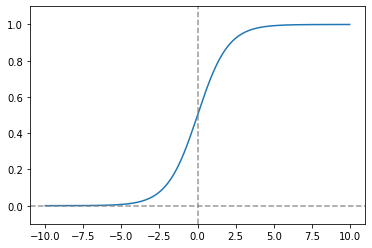

In [50]:
import matplotlib.pyplot as plt
import numpy as np

sigmoid_func = lambda x: (1/(1 + np.exp(-x)))

x = np.array([-10.0, -5.0, -2.0, -1.0, 0.0, 1.0, 2.0, 5.0, 10.0])
print(f'시그모이드 함수 입력 : {x} \n시그모이드 함수 출력 : {sigmoid_func(x)}')

x = np.arange(-10.0, 10.0, 0.01)
y = sigmoid_func(x)

plt.plot(x, y)
plt.ylim(-0.1, 1.1)
plt.axvline(0.0, color='gray', linestyle='--', alpha=0.8)
plt.axhline(0.0, color='gray', linestyle='--', alpha=0.8)
plt.show()

### (!) 계단함수와 시그모이드 함수의 비교점
- 계단 함수는 출력이 이산적인데 비해, 시그모이드 함수의 출력은 연속적이다.
- 두 함수 모두 입력이 작을 때 출력은 0, 출력이 커지면 1에 수렴한다.

### (!) 시그모이드 함수의 미분
$$ \sigma(x) = \cfrac{1}{1+exp(-x)}\newline\Rightarrow \sigma^\prime(x) = \sigma(x)(1-\sigma(x)) $$

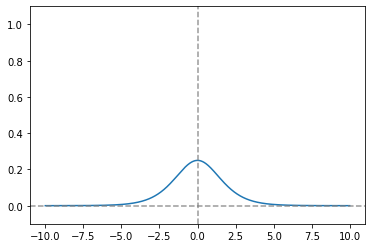

In [49]:
derivative_sigmoid = lambda x: sigmoid_func(x)*(1 - sigmoid_func(x))

x = np.arange(-10.0, 10.0, 0.01)
y = derivative_sigmoid(x)

plt.plot(x, y)
plt.ylim(-0.1, 1.1)
plt.axvline(0.0, color='gray', linestyle='--', alpha=0.8)
plt.axhline(0.0, color='gray', linestyle='--', alpha=0.8)
plt.show()

### b. ReLU 함수 (ReLU Function)
- 입력이 0을 넘으면 입력 자체를 출력, 0 이하면 0을 출력하는 함수
- 시그모이드 함수보다 도함수를 구할 때 컴퓨터 자원측면에서 경제적이고,  
  최대값이 1보다 큰 값도 가능하기 때문에 학습이 빠르다
$$
   h(x) = \begin{cases}0,\; (x < 0) \\ 
        x, \; (x \geq 0) \end{cases} 
$$

$$
   h^\prime(x) = \begin{cases}0,\; (x < 0) \\ 
        1, \; (x \geq 0) \end{cases} 
$$

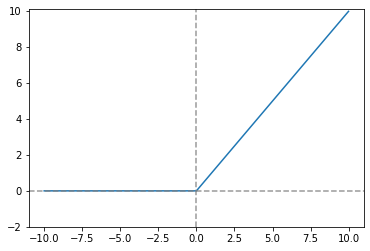

In [48]:
ReLU_func = lambda x: np.maximum(0, x)

x = np.arange(-10.0, 10.0, 0.01)
y = ReLU_func(x)

plt.plot(x, y)
plt.ylim(-2, 10.1)
plt.axvline(0.0, color='gray', linestyle='--', alpha=0.8)
plt.axhline(0.0, color='gray', linestyle='--', alpha=0.8)
plt.show()

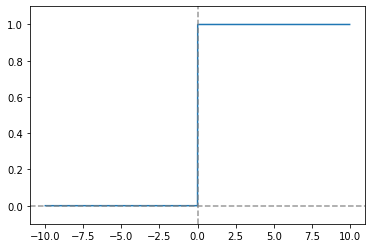

In [59]:
derivative_ReLU = lambda x: np.array(x > 0)

x = np.arange(-10.0, 10.0, 0.01)
y = derivative_ReLU(x)

plt.plot(x, y)
plt.ylim(-0.1, 1.1)
plt.axvline(0.0, color='gray', linestyle='--', alpha=0.8)
plt.axhline(0.0, color='gray', linestyle='--', alpha=0.8)
plt.show()

### (!) ReLU 함수의 변형
#### b-(1). leaky ReLU 함수
- 신경망이 깊어질수록 가중치 정보가 사라지는 Vanishing Gradient   
  문제를 보완하기 위해 제안됨.
  
$$
   h(x) = \begin{cases}0.01 x,\; (x < 0) \\ 
        x, \; (x \geq 0) \end{cases} 
$$
$$
   h^\prime(x) = \begin{cases}0.01,\; (x < 0) \\ 
        1, \; (x \geq 0) \end{cases} 
$$

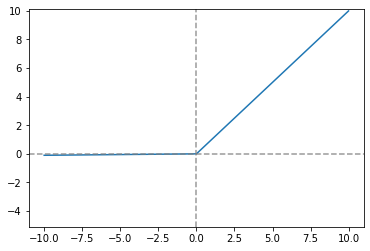

In [46]:
leaky_ReLU_func = lambda x : np.maximum(0.01*x, x)

x = np.arange(-10.0, 10.0, 0.01)
y = leaky_ReLU_func(x)

plt.plot(x, y)
plt.ylim(-5.1, 10.1)
plt.axvline(0.0, color='gray', linestyle='--', alpha=0.8)
plt.axhline(0.0, color='gray', linestyle='--', alpha=0.8)
plt.show()

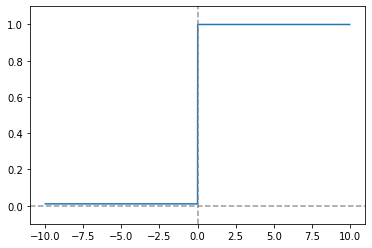

In [63]:
derivative_LReLU = lambda x: np.where(x > 0, 1, 0.01)

x = np.arange(-10.0, 10.0, 0.01)
y = derivative_LReLU(x)

plt.plot(x, y)
plt.ylim(-0.1, 1.1)
plt.axvline(0.0, color='gray', linestyle='--', alpha=0.8)
plt.axhline(0.0, color='gray', linestyle='--', alpha=0.8)
plt.show()

#### b-(2). Parameter ReLU 함수 (P-ReLU)
- Leaky ReLU 함수가 0.01이라는 고정된 값을 곱해주었다면, alpha 값을  
  하이퍼 파라미터로 지정하여 원하는 값을 줄 수 있다.
- alpha를 가중치 매개변수처럼 학습되도록 역전파에 alpha 값이 변경됨.

$$
   h(x) = \begin{cases}\alpha x,\; (x < 0) \\ 
        x, \; (x \geq 0) \end{cases} 
$$

$$
   h^\prime(x) = \begin{cases}\alpha,\; (x < 0) \\ 
        1, \; (x \geq 0) \end{cases} 
$$

- 대규모 이미지 데이터 셋에서는 ReLU보다 성능이 좋지만,  
  소규모 데이터 셋에서는 과적합이 될 수 있다.
- 메모리 에러가 날 수 있다는 단점이 있다


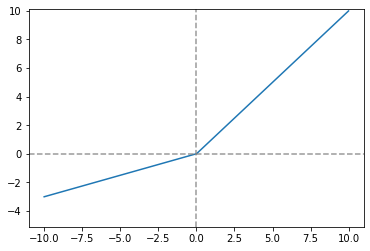

In [67]:
parameter_ReLU_func = lambda alpha, x: np.maximum(alpha*x, x)

x = np.arange(-10.0, 10.0, 0.01)
y = parameter_ReLU_func(0.3, x)

plt.plot(x, y)
plt.ylim(-5.1, 10.1)
plt.axvline(0.0, color='gray', linestyle='--', alpha=0.8)
plt.axhline(0.0, color='gray', linestyle='--', alpha=0.8)
plt.show()

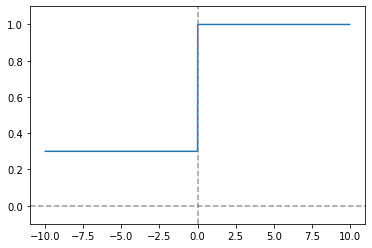

In [68]:
derivative_PReLU = lambda alpha, x: np.where(x > 0 , 1, alpha)

x = np.arange(-10.0, 10.0, 0.01)
y = derivative_PReLU(0.3, x)

plt.plot(x, y)
plt.ylim(-0.1, 1.1)
plt.axvline(0.0, color='gray', linestyle='--', alpha=0.8)
plt.axhline(0.0, color='gray', linestyle='--', alpha=0.8)
plt.show()

#### b-(3). ELU(Exponential Linear Unit)
- 메모리 에러 (OOM)을 해결하기 위해 나온 함수
- 0이하의 기울기가 곡선으로 미분이 잘되며, 정확도가 높음.
- 계산량이 많아 학습시간이 오래 걸린다는 단점이 있다.
$$
   h(\alpha, x) = \begin{cases}\alpha(e^x-1),\; (x < 0) \\ 
        x\qquad\quad,\;(x \geq 0) \end{cases} 
$$

$$
   h^\prime(\alpha, x) = \begin{cases}h(\alpha, x) + \alpha,\; (x < 0) \\ 
        1\qquad\quad,\;(x \geq 0) \end{cases} 
$$

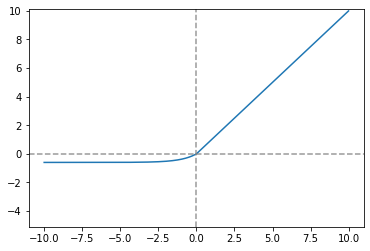

In [74]:
ELU_func = lambda alpha, x: np.where(x >= 0, x, alpha*(np.exp(x)-1))

x = np.arange(-10.0, 10.0, 0.01)
y = ELU_func(0.6, x)

plt.plot(x, y)
plt.ylim(-5.1, 10.1)
plt.axvline(0.0, color='gray', linestyle='--', alpha=0.8)
plt.axhline(0.0, color='gray', linestyle='--', alpha=0.8)
plt.show()

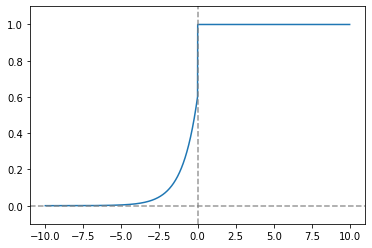

In [80]:
derivative_ELU = lambda alpha, x: np.where(x >= 0, 1, ELU_func(alpha, x) + alpha)

x = np.arange(-10.0, 10.0, 0.01)
y = derivative_ELU(0.6, x)

plt.plot(x, y)
plt.ylim(-0.1, 1.1)
plt.axvline(0.0, color='gray', linestyle='--', alpha=0.8)
plt.axhline(0.0, color='gray', linestyle='--', alpha=0.8)
plt.show()


### c. tanh 함수 (tanh Function)
- 시그모이드 함수와 비슷한 형태를 가짐.
- [-1, 1]  사이의 값을 가진다.
- 데이터의 중심을 0으로 위치시켜, 다음 층의 학습이 더 쉽게 이루어진다.
- 시그모이드 함수에 비해 안정적이므로 Vanishing Gradient 문제가   
  발생 가능성이 적다.

$$ h(x) = \cfrac{exp(x)-exp(-x)}{exp(x)+exp(-x)}\newline h^\prime(x) = 1-{h(x)}^2$$

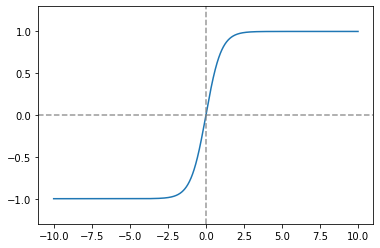

In [86]:
tanh_func = lambda x: (np.exp(x)-np.exp(-x)) / (np.exp(x) + np.exp(-x))

x = np.arange(-10.0, 10.0, 0.01)
y = tanh_func(x)

plt.plot(x, y)
plt.ylim(-1.3, 1.3)
plt.axvline(0.0, color='gray', linestyle='--', alpha=0.8)
plt.axhline(0.0, color='gray', linestyle='--', alpha=0.8)
plt.show()

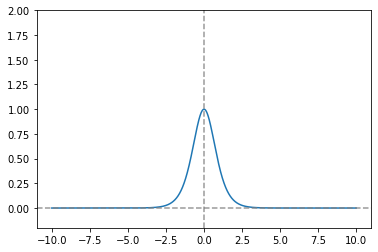

In [91]:
derivative_tanh = lambda x: 1 - tanh_func(x)**2

x = np.arange(-10.0, 10.0, 0.01)
y = derivative_tanh(x)

plt.plot(x, y)
plt.ylim(-0.2, 2)
plt.axvline(0.0, color='gray', linestyle='--', alpha=0.8)
plt.axhline(0.0, color='gray', linestyle='--', alpha=0.8)
plt.show()

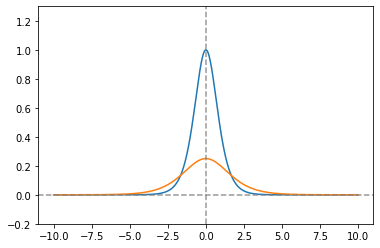

In [96]:
## 파란색이 tanh 미분 그래프
## 주황색은 sigmoid 미분 그래프

## sigmoid 함수에 비해 최댓값이 4배이므로, Vanishing Gradient 
## 문제가 적다.

x = np.arange(-10.0, 10.0, 0.01)
y = derivative_tanh(x)

plt.plot(x, y, x, derivative_sigmoid(x))
plt.ylim(-0.2, 1.3)
plt.axvline(0.0, color='gray', linestyle='--', alpha=0.8)
plt.axhline(0.0, color='gray', linestyle='--', alpha=0.8)
plt.show()

### d. Swish 함수
- Google에서 ReLU를 대체하기 위해 고안한 함수
- Sigmoid 함수에 입력값을 곱한 형태지만, ReLU와 비슷한 특징을 가진다.

$$ 
h(x)\;=\;\cfrac{x}{1+exp(-x)} = x*\sigma(x)\newline
h^\prime(x)\;=\;h(x)+\sigma(x)(1-h(x))\newline
where,\;\sigma(x)\;:\;sigmoid\;function
$$

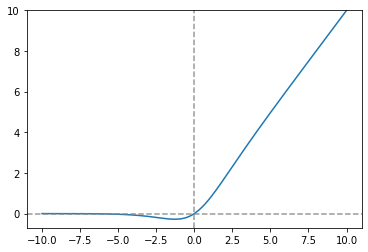

In [104]:
swish_func = lambda x: x*sigmoid_func(x)

x = np.arange(-10.0, 10.0, 0.01)
y = swish_func(x)

plt.plot(x, y)
plt.ylim(-0.7, 10.0)
plt.axvline(0.0, color='gray', linestyle='--', alpha=0.8)
plt.axhline(0.0, color='gray', linestyle='--', alpha=0.8)
plt.show()

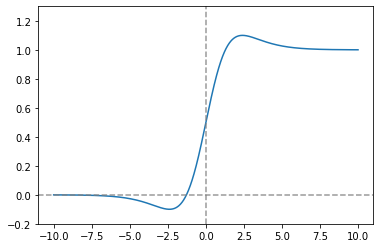

In [107]:
derivate_swish = lambda x: swish_func(x) + sigmoid_func(x)*(1-swish_func(x))

x = np.arange(-10.0, 10.0, 0.01)
y = derivate_swish(x)

plt.plot(x, y)
plt.ylim(-0.2, 1.3)
plt.axvline(0.0, color='gray', linestyle='--', alpha=0.8)
plt.axhline(0.0, color='gray', linestyle='--', alpha=0.8)
plt.show()

## 1-3. 3층 신경망 구현하기
- 3층 신경망에서 수행되는 입력부터 출력까지의 처리(순방향 처리)를 구현한다.
- 구현하고자 하는 신경망은 입력층 2개, 첫 번째 은닉층은 3개,  
  두 번째 은닉층은 2개, 출력층은 2개의 뉴런으로 구성된다.
![3층 신경망 구조](images/2.neuralnetwork/neuralnetwork.png)

In [118]:
## 입력층 => 첫번째 은닉층으로 가는 부분
X = np.array([1.0, 0.5])
W1 = np.array([[0.1, 0.3, 0.5], [0.2, 0.4, 0.6]])
b1 = np.array([0.1, 0.2, 0.3])

## 가중합
A1 = np.dot(X, W1) + b1

## 가중합 => 활성화 함수
Z1 = sigmoid_func(A1)

print(f'입력 데이터 : {X}, 형상 : {X.shape}')
print(f'첫 번째 은닉층 가중치 : \n{W1}, \n형상 : {W1.shape}\n\n')
print(f'첫 번째 은닉층 편향 : {b1}, 형상 : {b1.shape}')
print(f'첫 번째 은닉층 가중합 : {A1}, 형상 : {A1.shape}')
print(f'첫 번째 은닉층 출력 : {Z1}, 형상 : {Z1.shape}')

입력 데이터 : [1.  0.5], 형상 : (2,)
첫 번째 은닉층 가중치 : 
[[0.1 0.3 0.5]
 [0.2 0.4 0.6]], 
형상 : (2, 3)


첫 번째 은닉층 편향 : [0.1 0.2 0.3], 형상 : (3,)
첫 번째 은닉층 가중합 : [0.3 0.7 1.1], 형상 : (3,)
첫 번째 은닉층 출력 : [0.57444252 0.66818777 0.75026011], 형상 : (3,)


In [117]:
## 첫번째 은닉층 => 두번째 은닉층으로 가는 부분
W2 = np.array([[0.1, 0.4], [0.2, 0.5], [0.3, 0.6]])
b2 = np.array([0.1, 0.2])

A2 = np.dot(Z1, W2) + b2
Z2 = sigmoid_func(A2)

print(f'두 번째 은닉층 가중치 : \n{W2}, \n형상 : {W2.shape}\n\n')
print(f'두 번째 은닉층 편향 : {b2}, 형상 : {b2.shape}')
print(f'두 번째 은닉층 가중합 : {A2}, 형상 : {A2.shape}')
print(f'두 번째 은닉층 출력 : {Z2}, 형상 : {Z2.shape}')

첫번째 은닉층 가중치 : 
[[0.1 0.4]
 [0.2 0.5]
 [0.3 0.6]], 
형상 : (3, 2)


첫번째 은닉층 편향 : [0.1 0.2], 형상 : (2,)
첫번째 은닉층 가중합 : [0.51615984 1.21402696], 형상 : (2,)
첫번째 은닉층 출력 : [0.62624937 0.7710107 ], 형상 : (2,)


In [120]:
## 두번째 은닉층 => 출력층으로 가는 부분
## 출력층의 활성화 함수로 함등함수를 이용
W3 = np.array([[0.1, 0.3], [0.2, 0.4]])
b3 = np.array([0.1, 0.2])

output = np.dot(Z2, W3) + b3

print(f'출력층 가중치 : \n{W3}, \n형상 : {W3.shape}\n\n')
print(f'출력층 편향   : {b3},     형상 : {b3.shape}')
print(f'출력 : {output}, 형상 : {output.shape}')

출력층 가중치 : 
[[0.1 0.3]
 [0.2 0.4]], 
형상 : (2, 2)


출력층 편향   : [0.1 0.2],     형상 : (2,)
출력 : [0.31682708 0.69627909], 형상 : (2,)


### a. 함수형으로 구현해보기

In [128]:
def init_network():
    network = {}
    
    network['W1'] = np.random.normal(0, 1, (2, 3))
    network['b1'] = np.random.normal(0, 1, (1, 3))
    
    network['W2'] = np.random.normal(0, 1, (3, 2))
    network['b2'] = np.random.normal(0, 1, (1, 2))
    
    network['W3'] = np.random.normal(0, 1, (2, 2))
    network['b3'] = np.random.normal(0, 1, (1, 2))
    
    return network

def forward(x):
    network = init_network()
    W1, W2, W3 = network['W1'], network['W2'], network['W3']
    b1, b2, b3 = network['b1'], network['b2'], network['b3']
    
    a1     = sigmoid_func(np.dot(x, W1) + b1)
    a2     = sigmoid_func(np.dot(a1, W2) + b2)
    output = np.dot(a2, W3) + b3
    
    return output

x = np.array([1.0, 0.5])
output = forward(x)

print(f'출력 : {output}')

출력 : [[-1.23269306  1.15930456]]


## 1-4. 출력층 설계
- 신경망은 분류와 회귀 모두에 이용할 수 있다.
- 신경망을 이용해 해결할 문제에 따라 출력층에서 사용하는 활성화 함수가 달라진다.
- 일반적으로 회귀에는 항등 함수, 분류에는 소프트 맥스 함수를 사용한다.  

#### a. 항등 함수  
- 입력을 그대로 출력하는 함수  

#### b. 소프트맥스 함수
$$ 
y_k\;=\;\cfrac{exp(a_k)}{\sum_{i=1}^{n}{exp(a_i)}}
$$
- n   : 출력층의 뉴런수
- a_k : k번째의 입력
- y_k : k번째의 출력

In [131]:
softmax_func = lambda x: np.exp(x) / np.sum(np.exp(x))

input_array = np.array([0.3, 2.9, 4.0])
softmax_func(input_array)

array([0.01821127, 0.24519181, 0.73659691])

#### b-(!). 소프트맥스 함수 구현시 주의점
- 소프트맥스의 exp(x) 항에서 x값으로 조금만 큰 값이 들어가면  
  출력값으로도 아주 큰값이 나와 연산 속도가 느려지고, 수치가 불안정해진다.
- 이 문제를 해결하기 위해 다음과 같은 방법을 쓴다.

$$
 y_k\;=\;\cfrac{exp(a_k)}{\sum_{i=1}^{n}{exp(a_i)}}\;=\;
 \cfrac{Cexp(a_k)}{C\sum_{i=1}^{n}{exp(a_i)}}\newline
  =\;\cfrac{exp(a_k + logC)}{\sum_{i=1}^{n}{exp(a_i + logC)}}\newline
  =\;\cfrac{exp(a_k + C^\prime)}{\sum_{i=1}^{n}{exp(a_i + C^\prime)}}\newline where,\;C^\prime\;=\;logC
$$


In [138]:
a = np.array([1010, 1000, 990])

## 원래 함수
print(f'원래 함수 실행 결과 : {softmax_func(a)}\n')

## 수정 함수
fix_softmax_func = lambda x: np.exp(x - np.max(x)) / np.sum(np.exp(x - np.max(x)))
print(f'array - max : {a - np.max(a)}')
print(f'np.exp : {np.exp(a - np.max(a))}')
print(f'수정 함수 실행 결과 : {fix_softmax_func(a)}')

원래 함수 실행 결과 : [nan nan nan]

array - max : [  0 -10 -20]
np.exp : [1.00000000e+00 4.53999298e-05 2.06115362e-09]
수정 함수 실행 결과 : [9.99954600e-01 4.53978686e-05 2.06106005e-09]


/tmp/ipykernel_1499/2534005421.py:1: RuntimeWarning: overflow encountered in exp
  softmax_func = lambda x: np.exp(x) / np.sum(np.exp(x))
/tmp/ipykernel_1499/2534005421.py:1: RuntimeWarning: invalid value encountered in true_divide
  softmax_func = lambda x: np.exp(x) / np.sum(np.exp(x))


#### (!) softmax의 특징
- softmax 함수의 출력은 0~1 사이의 실수이고, 출력의 총합은 1이다.
- 이러한 특징은 softmax 함수의 출력을 확률로 해석할 수 있다.
